In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from zipfile import ZipFile
file_name = '/content/FaceMaskDetection.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')


Done


What below Code Does: Parses XML Files:

1. Extracts image filename, dimensions, and bounding box coordinates.

2. Extracts class labels (class_name).

3. Stores Data: pandass dataframs(annotations.csv)



In [ ]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
from PIL import Image

# Paths to your dataset
image_dir = '/content/images'  # Folder containing images
annotation_dir = '/content/annotations'  # Folder containing XML files

# Initialize lists to store data
data = []

# Parse each XML file
for xml_file in os.listdir(annotation_dir):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(annotation_dir, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract image information
        filename = root.find('filename').text
        width = int(root.find('size/width').text)
        height = int(root.find('size/height').text)

        # Extract object information
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)
            xmax = int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)

            # Append to data list
            data.append([filename, width, height, class_name, xmin, ymin, xmax, ymax])

# Convert to DataFrame
columns = ['filename', 'width', 'height', 'class_name', 'xmin', 'ymin', 'xmax', 'ymax']
df = pd.DataFrame(data, columns=columns)

# Display the first few rows
print(df.head())

# Save the DataFrame to CSV for future use
df.to_csv('annotations.csv', index=False)

              filename  width  height class_name  xmin  ymin  xmax  ymax
0  maksssksksss707.png    301     400  with_mask    64   161   183   323
1  maksssksksss227.png    400     267  with_mask   273    87   300   116
2  maksssksksss227.png    400     267  with_mask   344    60   366    88
3  maksssksksss227.png    400     267  with_mask   246    50   271    82
4  maksssksksss227.png    400     267  with_mask   146   104   169   126


In [ ]:
# for i in df.columns:
#   print("Column Name=", i)
#   print(df[i].value_counts().sort_values(ascending=False))
#   print("---------------------------------------------------------------------------------------------------------------")

df['class_name'].value_counts()

,count
class_name,
with_mask,3232
without_mask,717
mask_weared_incorrect,123


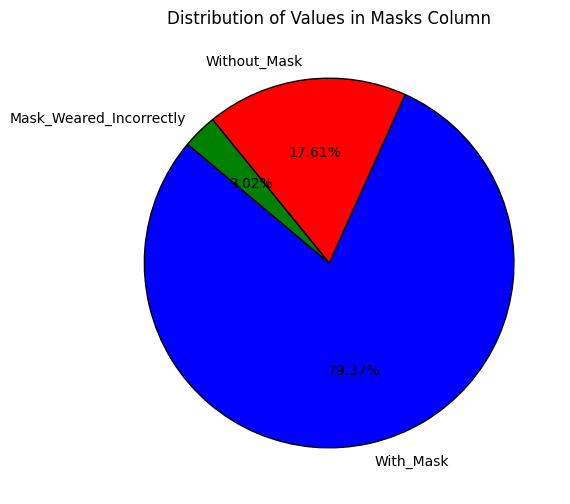

In [ ]:
import matplotlib.pyplot as plt

# col_name = 'Column1'
# null_count = df[col_name].isnull().sum()    # Count of null values
# non_null_count = df[col_name].notnull().sum()  # Count of non-null values


labels = ['With_Mask', 'Without_Mask', 'Mask_Weared_Incorrectly']
sizes = [df[df['class_name']=='with_mask'].shape[0], df[df['class_name']=='without_mask'].shape[0], df[df['class_name']=='mask_weared_incorrect'].shape[0]]
colors = ['blue','red', 'green']


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title(f"Distribution of Values in Masks Column")
plt.show()


Q. What this part of code does?


```
plt.text(bar.get_x() + bar.get_width() /2
    bar.get_height(),
    int(bar.get_height()),
    ha='center', va='bottom', fontsize=12, fontweight='bold'
    )
```



This will ensure the count values appear clearly on top of each bar.

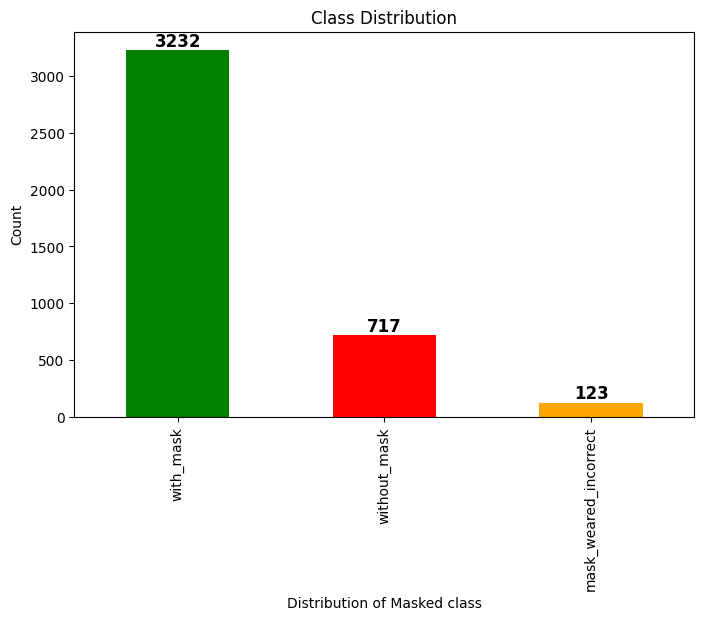

In [ ]:
class_counts = df['class_name'].value_counts()
plt.figure(figsize=(8, 5))
bars = class_counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Distribution of Masked class')
plt.ylabel('Count')
# plt.legend()

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

# Preprocessing and EDA

1. Visualize Samples with Bounding Boxes:


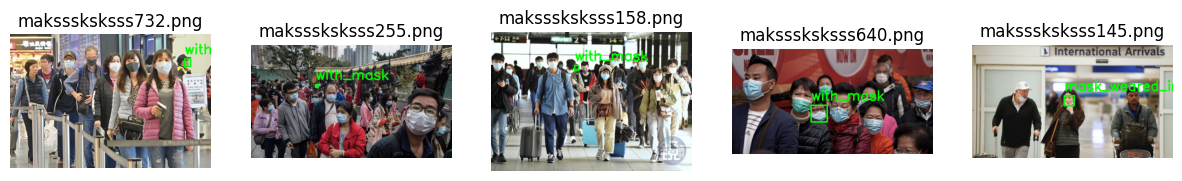

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

def visualize_samples(df, image_dir, num_samples=5):
    """Visualize random samples with bounding boxes"""
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        # Randomly select a sample
        sample = df.sample(1).iloc[0]
        image_path = os.path.join(image_dir, sample['filename'])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

        # Draw bounding box
        xmin, ymin, xmax, ymax = sample['xmin'], sample['ymin'], sample['xmax'], sample['ymax']
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, sample['class_name'], (xmin, ymin-10),
                     cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Plot
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(sample['filename'])
    plt.show()

# Visualize 5 random samples
visualize_samples(df, image_dir)

Reason for this output:
See, there are multiple objects in each xml file. We are only showing 1 person in each xml file. That's why we have this kind off output. Also, it keeps the image less messy.

However, if we want to show all annotations, here's the code.

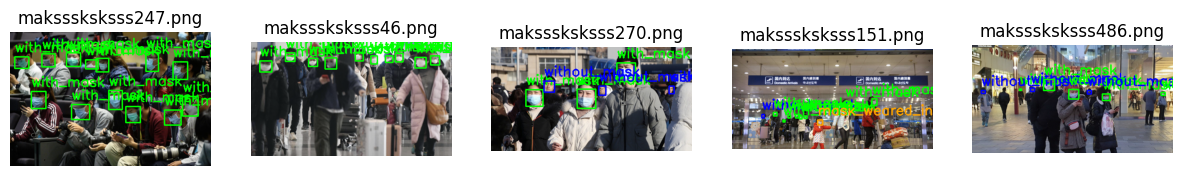

In [ ]:
def visualize_all_boxes(df, image_dir, num_samples=5):
    """Visualize all bounding boxes in random samples"""
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        # Randomly select an image
        image_name = df['filename'].sample(1).iloc[0]
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

        # Get all objects in the image
        objects_in_image = df[df['filename'] == image_name]

        # Draw all bounding boxes
        for _, obj in objects_in_image.iterrows():
            xmin, ymin, xmax, ymax = obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax']
            class_name = obj['class_name']

            # Assign different colors for each class
            if class_name == 'with_mask':
                color = (0, 255, 0)  # Green
            elif class_name == 'without_mask':
                color = (0, 0, 255)  # Red
            else:
                color = (255, 165, 0)  # Orange

            # Draw bounding box and label
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
            cv2.putText(image, class_name, (xmin, ymin-10),
                         cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Plot
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Visualize 5 random images with all bounding boxes
visualize_all_boxes(df, image_dir)

2. Analyse Image Sizes

Unique image sizes:
      width  height
0       301     400
1       400     267
15      400     235
16      400     300
40      400     226
...     ...     ...
3873    400     310
3875    275     400
3971    323     400
4024    400     206
4062    306     400

[136 rows x 2 columns]


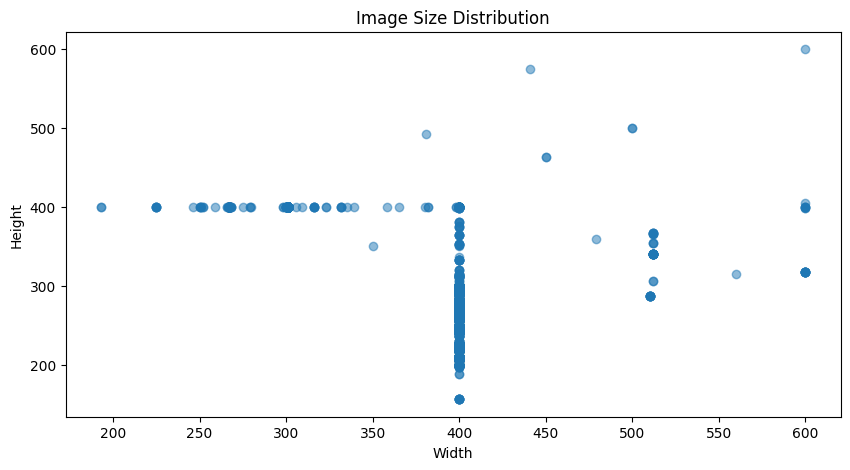

In [ ]:
# Check image dimensions
image_sizes = df[['width', 'height']].drop_duplicates()
print("Unique image sizes:")
print(image_sizes)

# Plot image size distribution
plt.figure(figsize=(10, 5))
plt.scatter(df['width'], df['height'], alpha=0.5)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

3. Prepare the image for applying algorithms

In [ ]:
def prepare_cnn_dataset(df, image_dir, output_dir='dataset_cnn'):
    """Crop all faces and organize into class-specific folders"""
    os.makedirs(output_dir, exist_ok=True)

    for image_name in df['filename'].unique():
        # Load image
        image_path = os.path.join(image_dir, image_name)
        image = cv2.imread(image_path)

        # Get all objects in the image
        objects_in_image = df[df['filename'] == image_name]

        for _, obj in objects_in_image.iterrows():
            # Crop face
            xmin, ymin, xmax, ymax = obj['xmin'], obj['ymin'], obj['xmax'], obj['ymax']
            face = image[ymin:ymax, xmin:xmax]

            # Save cropped face
            class_dir = os.path.join(output_dir, obj['class_name'])
            os.makedirs(class_dir, exist_ok=True)
            output_path = os.path.join(class_dir, f"{image_name}_{xmin}_{ymin}.jpg")
            cv2.imwrite(output_path, face)

# Prepare dataset for CNN
prepare_cnn_dataset(df, image_dir)

In [ ]:
df['class_name'].value_counts()

,count
class_name,
with_mask,3232
without_mask,717
mask_weared_incorrect,123


Imbalance Handling

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Paths
dataset_path = 'dataset_cnn'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

Data Augmentation Setup

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
dataset_path = 'dataset_cnn'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# No augmentation for validation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training dataset
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation dataset
val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 3259 images belonging to 3 classes.
Found 813 images belonging to 3 classes.


Verify LAbels

In [ ]:
# Check training generator
for x, y in train_generator:
    print("Training batch - X shape:", x.shape, "Y shape:", y.shape)
    break

# Check validation generator
for x, y in val_generator:
    print("Validation batch - X shape:", x.shape, "Y shape:", y.shape)
    break

Training batch - X shape: (32, 224, 224, 3) Y shape: (32, 3)
Validation batch - X shape: (32, 224, 224, 3) Y shape: (32, 3)


Model Architecture

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

def build_model():
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base layers
    base_model.trainable = False

    # Custom head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(3, activation='softmax')(x)  # 3 classes

    model = Model(inputs=base_model.input, outputs=outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,586,691 (9.87 MB)

 Trainable params: 328,707 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Class weight calculation

In [ ]:
# import numpy as np

# Class counts from your dataset
class_counts = {
    'with_mask': 3232,
    'without_mask': 717,
    'mask_weared_incorrect': 123
}

# Calculate class weights
total = sum(class_counts.values())
class_weights = {i: total/(len(class_counts)*count)
                for i, (cls, count) in enumerate(class_counts.items())}

print("Class Weights:", class_weights)

Class Weights: {0: 0.41996699669966997, 1: 1.8930729893072988, 2: 11.035230352303524}


Training Configurations

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train the model
history = model.fit(
    train_generator,
    # epochs=20,
    epochs = 2,
    validation_data=val_generator,
    class_weight=class_weights,  # From Step 4
    callbacks=callbacks
)

Epoch 1/2
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6044 - loss: 2.1820

102/102 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6048 - loss: 2.1806 - val_accuracy: 0.4871 - val_loss: 0.9536
Epoch 2/2
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6779 - loss: 1.8487

102/102 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6778 - loss: 1.8491 - val_accuracy: 0.6273 - val_loss: 0.7553


Model Evaluation

In [ ]:
# Load the best model
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6193 - loss: 0.7781
Validation Accuracy: 62.73%


Making Predictions

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_mask(image_path):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale to match training

    # Make prediction
    pred = model.predict(img_array)[0]
    class_names = list(train_generator.class_indices.keys())
    return class_names[np.argmax(pred)], np.max(pred)

# Example usage
image_path = 'test_image.jpg'  # Replace with your image path
pred_class, confidence = predict_mask(image_path)
print(f"Prediction: {pred_class} ({confidence*100:.2f}%)")

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.jpg'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
# from google.colab import files
# files.download('/content/dataset_cnn')  # Replace with your file's name
# files.download('/content/best_model.h5')
# files.download('/content/annotations.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>